# Candlestick Piercing

https://www.investopedia.com/terms/piercing-pattern.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2016-01-01'
end = '2021-10-08'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2.77,2.82,2.63,2.77,2.77,32516800
2016-01-05,2.77,2.80,2.64,2.75,2.75,12972300
2016-01-06,2.66,2.71,2.47,2.51,2.51,23759400
2016-01-07,2.43,2.48,2.26,2.28,2.28,22203500
2016-01-08,2.36,2.42,2.10,2.14,2.14,31822400


## Candlestick with Piercing

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,735967.0,2.77,2.82,2.63,2.77,2.77,32516800,False
1,735968.0,2.77,2.80,2.64,2.75,2.75,12972300,False
2,735969.0,2.66,2.71,2.47,2.51,2.51,23759400,False
3,735970.0,2.43,2.48,2.26,2.28,2.28,22203500,False
4,735971.0,2.36,2.42,2.10,2.14,2.14,31822400,False


Text(0, 0.5, 'Price')

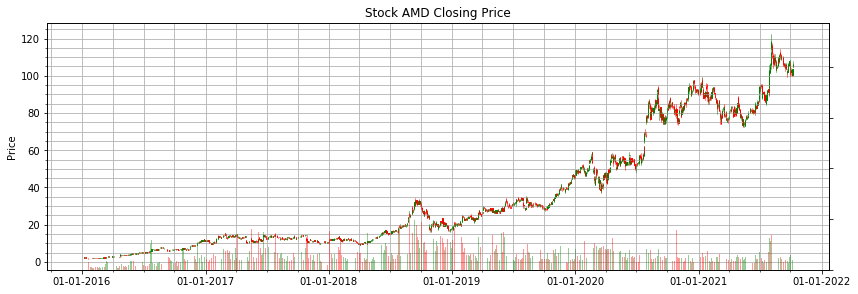

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
piercing = talib.CDLPIERCING(df['Open'], df['High'], df['Low'], df['Close'])

piercing = piercing[piercing != 0]

In [6]:
df['piercing'] = talib.CDLPIERCING(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['piercing'] !=0]

,Open,High,Low,Close,Adj Close,Volume,piercing
Date,,,,,,,
2018-06-28,14.850000,15.360000,14.75,15.31,15.31,48716800,100
2018-08-17,19.120001,19.820000,18.73,19.77,19.77,60616600,100
2020-02-03,46.400002,48.099998,46.23,48.02,48.02,46983500,100


In [8]:
df['Adj Close'].loc[df['piercing'] !=0]

Date
2018-06-28    15.31
2018-08-17    19.77
2020-02-03    48.02
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['piercing'] !=0].index

DatetimeIndex(['2018-06-28', '2018-08-17', '2020-02-03'], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
piercing

Date
2018-06-28    100
2018-08-17    100
2020-02-03    100
dtype: int32

In [11]:
piercing.index

DatetimeIndex(['2018-06-28', '2018-08-17', '2020-02-03'], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,piercing
Date,,,,,,,
2016-01-04,2.770000,2.820000,2.630000,2.770000,2.770000,32516800,0
2016-01-05,2.770000,2.800000,2.640000,2.750000,2.750000,12972300,0
2016-01-06,2.660000,2.710000,2.470000,2.510000,2.510000,23759400,0
2016-01-07,2.430000,2.480000,2.260000,2.280000,2.280000,22203500,0
2016-01-08,2.360000,2.420000,2.100000,2.140000,2.140000,31822400,0
...,...,...,...,...,...,...,...
2021-10-01,102.599998,103.000000,100.639999,102.449997,102.449997,41491600,0
2021-10-04,101.739998,101.849998,99.820000,100.339996,100.339996,41967100,0
2021-10-05,100.919998,102.870003,100.610001,101.809998,101.809998,31455200,0


Text(0, 0.5, 'Price')

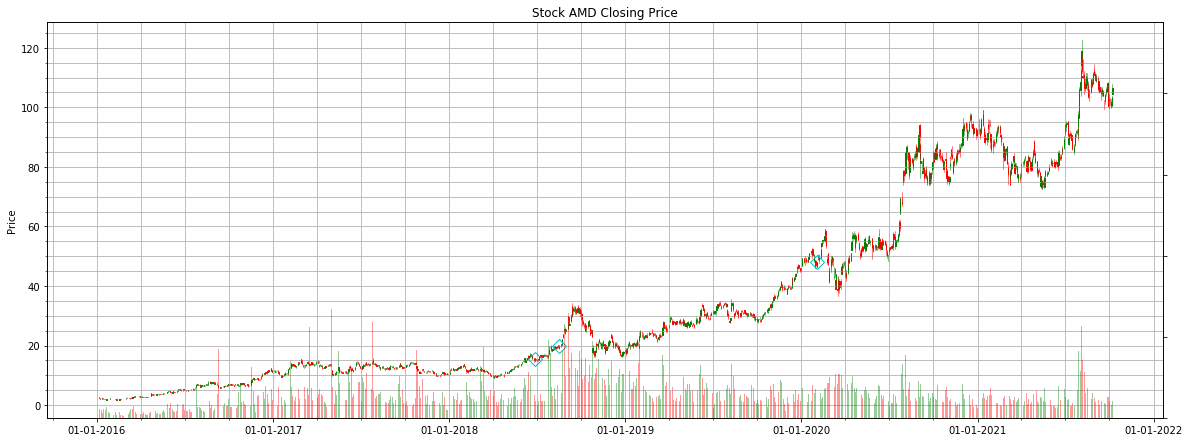

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['piercing'] !=0].index, df['Adj Close'].loc[df['piercing'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2020-02-01':'2020-03-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,piercing,VolumePositive
0,737458.0,46.400002,48.099998,46.230000,48.020000,48.020000,46983500,100,True
1,737459.0,49.209999,49.750000,48.610001,49.450001,49.450001,46302100,0,True
2,737460.0,50.290001,50.419998,49.310001,49.840000,49.840000,42737100,0,False
3,737461.0,48.799999,49.389999,47.630001,49.320000,49.320000,48670600,0,True
4,737462.0,48.910000,50.669998,48.639999,49.730000,49.730000,53107600,0,True


Text(0, 0.5, 'Price')

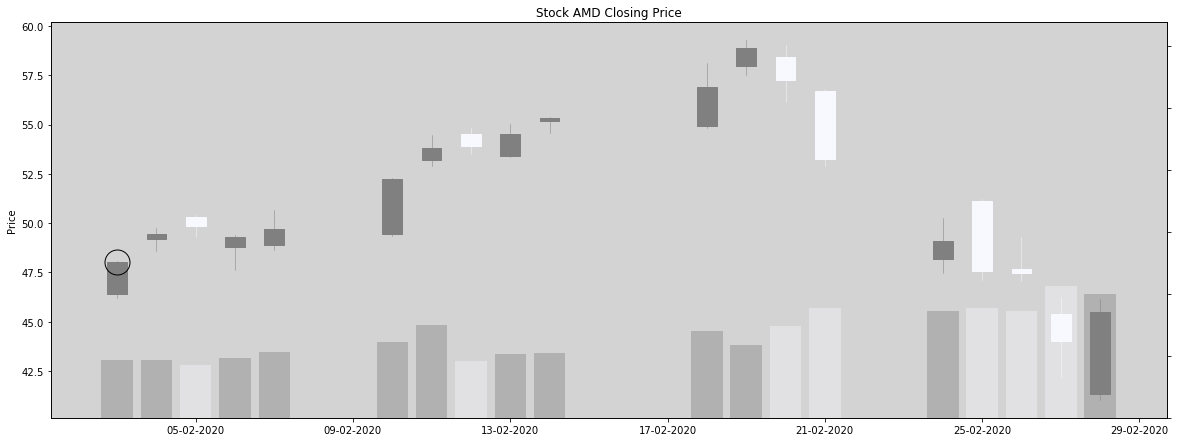

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('lightgrey')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='grey', colordown='ghostwhite', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['piercing'] !=0].index, df['Adj Close'].loc[df['piercing'] !=0],
                'ok', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'grey', False: 'ghostwhite'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

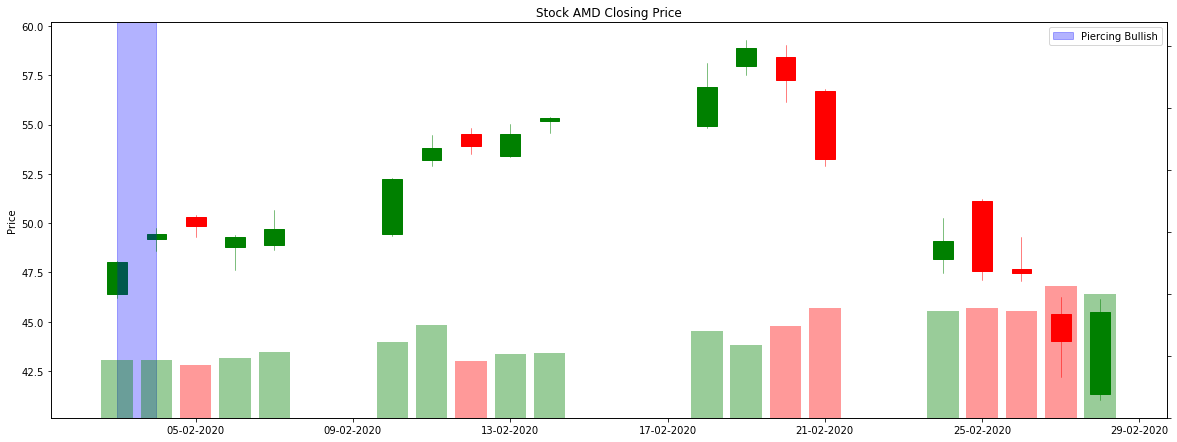

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2020,2,3)), date2num(datetime(2020,2,4)), 
           label="Piercing Bullish",color="blue", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')